# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [2]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

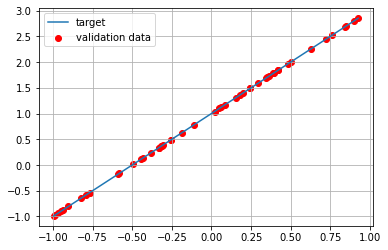

In [3]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [4]:
# compose the NN model
import os
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras import activations
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse']) #mse mean square error, #sgd stochastic gradient descend

In [5]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [6]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 0s 9ms/step - loss: 3.2411 - mse: 3.2411 - val_loss: 2.4337 - val_mse: 2.4337
Epoch 2/30
16/16 [==============================] - 0s 2ms/step - loss: 2.4110 - mse: 2.4110 - val_loss: 1.8423 - val_mse: 1.8423
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 1.8338 - mse: 1.8338 - val_loss: 1.4216 - val_mse: 1.4216
Epoch 4/30
16/16 [==============================] - 0s 2ms/step - loss: 1.4159 - mse: 1.4159 - val_loss: 1.1170 - val_mse: 1.1170
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 1.1108 - mse: 1.1108 - val_loss: 0.8832 - val_mse: 0.8832
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 0.8763 - mse: 0.8763 - val_loss: 0.7051 - val_mse: 0.7051
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6973 - mse: 0.6973 - val_loss: 0.5648 - val_mse: 0.5648
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 0.5568 - mse: 0.55

In [7]:
# return weights and biases
model.get_weights()

[array([[1.8912189]], dtype=float32), array([0.99872404], dtype=float32)]

In [8]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 500us/step - loss: 0.0038 - mse: 0.0038

Test loss: 0.003761850530281663
Test accuracy: 0.003761850530281663


In [9]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 999us/step - loss: 0.0038 - mse: 0.0038

Test loss: 0.003761850530281663
Test accuracy: 0.003761850530281663


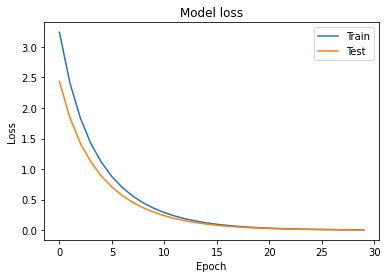

In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

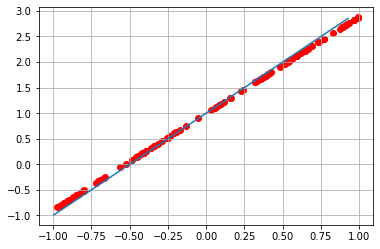

In [11]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

In [12]:
keras.backend.clear_session()
np.random.seed(0)

#exploring with n_epochs=70, n_train=500, sigma = 0

N_epochs = 70
N_train = 500

x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=N_epochs,
          verbose=0,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

In [14]:
# return weights and biases
model.get_weights()

[array([[1.9991765]], dtype=float32), array([0.9999891], dtype=float32)]

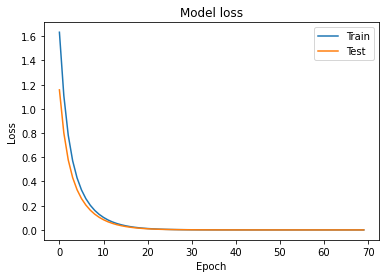

In [15]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

It looks with **n_train = 500** and $\sigma$ = 0, 30 epochs are enough to almost bring the loss to zero.
Here I explore how the training is good for different **n_train** (with **N_epochs = 70**). See following cells.

#### Training with n_train = 100

In [16]:

#N_epochs = 70

keras.backend.clear_session()
np.random.seed(0)

n_train=100

x_train = np.random.uniform(-1, 1, n_train)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=70,
          verbose=0,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

#### Training with n_train = 500

In [17]:
n_train=500
np.random.seed(0)
x_train = np.random.uniform(-1, 1, n_train)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

model2 = tf.keras.Sequential()
model2.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history2 = model2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=70,
          verbose=0,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

#### Training with n_train = 1000

In [18]:
n_train = 1000

np.random.seed(0)
x_train = np.random.uniform(-1, 1, n_train)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)
model3 = tf.keras.Sequential()
model3.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history3 = model3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          verbose=0,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

### Plotting results 

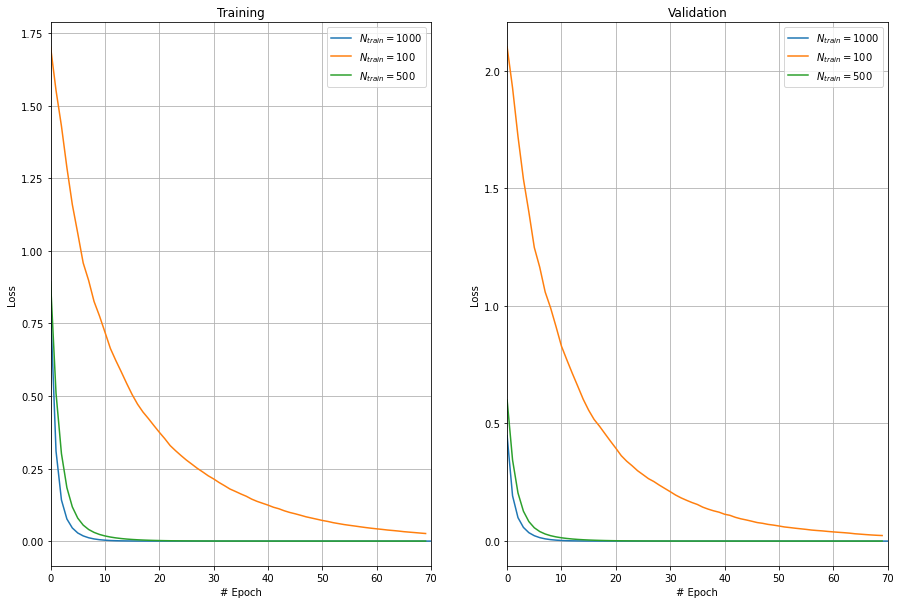

In [19]:
fig,ax = plt.subplots(1,2,figsize=(15,10))
ax[0].set_title("Training")
ax[1].set_title("Validation")
ax[0].set_xlim(0,N_epochs)
ax[1].set_xlim(0,N_epochs)

ax[0].plot(history3.history['loss'],label='$N_{train}=1000$')
ax[1].plot(history3.history['val_loss'],label='$N_{train}=1000$')


ax[0].plot(history.history['loss'],label='$N_{train}=100$')
ax[1].plot(history.history['val_loss'],label='$N_{train}=100$')

ax[0].plot(history2.history['loss'],label='$N_{train}=500$')
ax[1].plot(history2.history['val_loss'],label='$N_{train}=500$')



ax[0].set_xlabel('# Epoch')
ax[1].set_xlabel('# Epoch')

ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Loss')


ax[0].legend()
ax[1].legend()
ax[0].grid(True)
ax[1].grid(True)

plt.show()

As expected, if **n_train** is low, more epochs are needed to bring the loss function to zero.

### Introducing Noise

In [20]:
keras.backend.clear_session()
np.random.seed(0)
N_epochs = 70
N_train = 500

#### $\sigma$ = 0.1 (little noise)

In [21]:
sigma = 0.1 #little noise
np.random.seed(0)
x_train = np.random.uniform(-1, 1, n_train)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function


y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=70,
          verbose=0,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

#### $\sigma$ = 0.5 (medium noise)

In [22]:
sigma = 0.5

np.random.seed(0)
x_train = np.random.uniform(-1, 1, n_train)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function


y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

model2 = tf.keras.Sequential()
model2.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])

history2 = model2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=70,
          verbose=0,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

#### $\sigma$ = 1 (strong noise) 

In [23]:
sigma = 1 #strong noise

np.random.seed(0)
x_train = np.random.uniform(-1, 1, n_train)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function


y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)
model3 = tf.keras.Sequential()
model3.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model3.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history3 = model3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          verbose=0,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

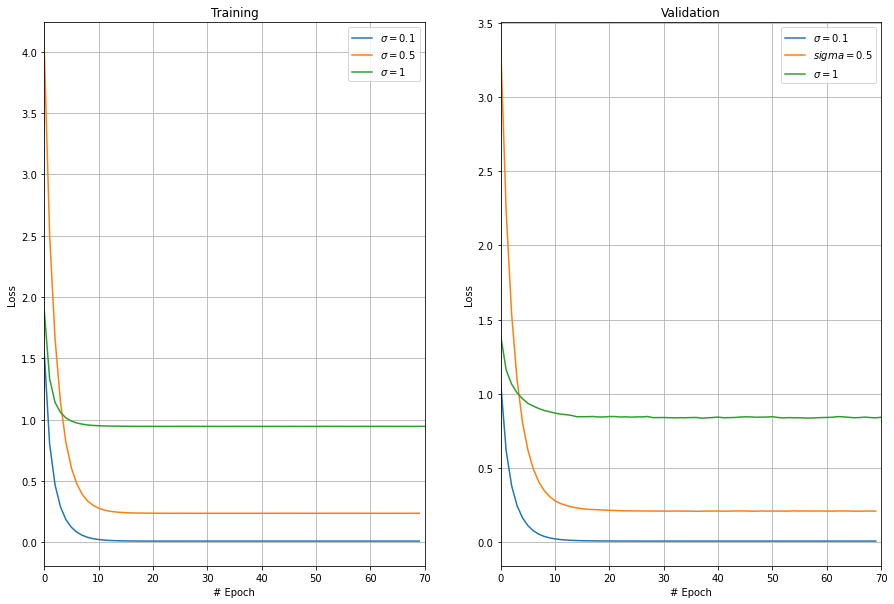

In [24]:
fig,ax = plt.subplots(1,2,figsize=(15,10))
ax[0].set_title("Training")
ax[1].set_title("Validation")
ax[0].set_xlim(0,N_epochs)
ax[1].set_xlim(0,N_epochs)

ax[0].plot(history.history['loss'],label='$\sigma=0.1$')
ax[1].plot(history.history['val_loss'],label='$\sigma=0.1$')


ax[0].plot(history2.history['loss'],label='$\sigma=0.5$')
ax[1].plot(history2.history['val_loss'],label='$sigma=0.5$')

ax[0].plot(history3.history['loss'],label='$\sigma=1$')
ax[1].plot(history3.history['val_loss'],label='$\sigma=1$')



ax[0].set_xlabel('# Epoch')
ax[1].set_xlabel('# Epoch')

ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Loss')



ax[0].legend()
ax[1].legend()
ax[0].grid(True)
ax[1].grid(True)

plt.show()

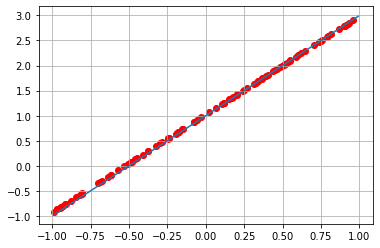

In [25]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model3.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In [26]:
keras.backend.clear_session()
np.random.seed(0)

x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_func = np.random.uniform(-1.5, 1.5, 100)
x_valid.sort()
x_func.sort()
y_target = 4-3*x_func-2*x_func**2 + 3*x_func**3 # ideal (target) polynomial function

sigma = 0.1 # noise standard deviation, little but present
y_train = np.random.normal(4-3*x_train-2*x_train**2 + 3*x_train**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(4-3*x_valid-2*x_valid**2 + 3*x_valid**3, sigma)

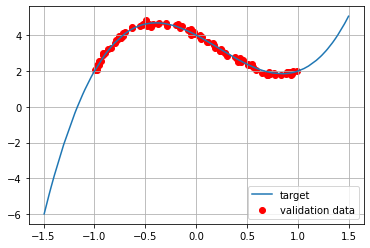

In [27]:
plt.plot(x_func, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

After several attempts and trainings, I found the following structure as a good compromise between number of parameters and effectiveness. 

In [28]:
model = tf.keras.Sequential()
tf.keras.activations.relu(x_train, alpha=0.0, max_value=6, threshold=0.0)

model.add(Dense(10, input_shape=(1,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softsign'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1,))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 7

In [30]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
32/32 [==============================] - 0s 6ms/step - loss: 3.6146 - mse: 3.6146 - val_loss: 0.7941 - val_mse: 0.7941
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.5536 - mse: 0.5536 - val_loss: 0.4809 - val_mse: 0.4809
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3114 - mse: 0.3114 - val_loss: 0.4125 - val_mse: 0.4125
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 0.2502 - mse: 0.2502 - val_loss: 0.4269 - val_mse: 0.4269
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.1995 - mse: 0.1995 - val_loss: 0.2848 - val_mse: 0.2848
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.1473 - mse: 0.1473 - val_loss: 0.2366 - val_mse: 0.2366
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.1171 - mse: 0.1171 - val_loss: 0.1724 - val_mse: 0.1724
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.0957 - mse: 0.09

In [31]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 833us/step - loss: 0.0119 - mse: 0.0119

Test loss: 0.01187427993863821
Test accuracy: 0.01187427993863821


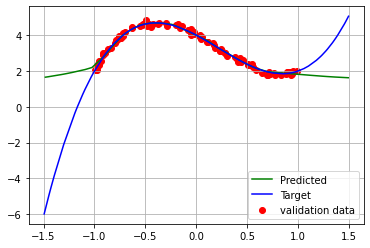

In [32]:
x_predicted = np.random.uniform(-1.5, 1.5, 100)
x_predicted.sort()
y_predicted = model.predict(x_predicted)
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.plot(x_predicted, y_predicted,color='green', label='Predicted')
plt.plot(x_func, y_target, color='blue', label='Target')
plt.legend()
plt.grid(True)
plt.show()

Results show the possibility of the program to predict well points in the x-range **$[-1, 1]$** (where the model was trained), while It completely fails outside this range. I also noticed the program begin not to predict really well also inside the range near boundaries. I could have tried to increase the number of parameters, but I wanted not to risk overfitting and I found this as a good compromise.

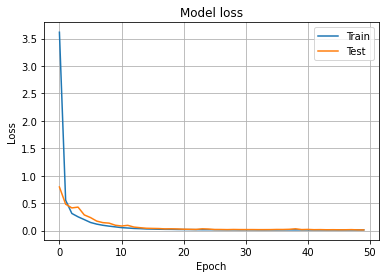

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

## Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

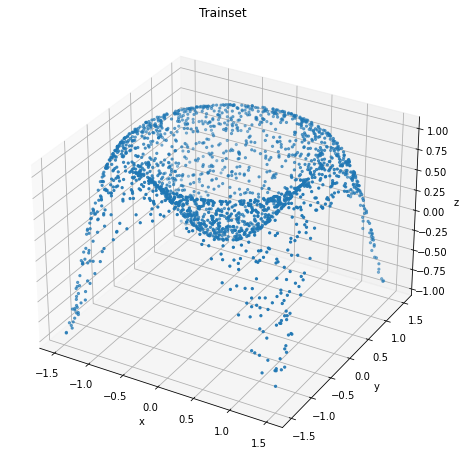

In [34]:
from mpl_toolkits.mplot3d import Axes3D
#NN parameters
ntrain=2000
nval=200
xmin=-1.5
xmax=1.5
sigma=0.0     #no noise
x_train=[]
x_val=[]
z_train=[]
z_val=[]


def f(x,y):
    return np.sin(x**2 + y**2)
np.random.seed(0)


x_train = np.zeros((ntrain, 2))
z_train = np.zeros((ntrain, 1))

x_val = np.zeros((nval, 2))
z_val = np.zeros((nval, 1))

for i in range(ntrain):
    x_train[i,0]=np.random.uniform(xmin, xmax) # x values 
    x_train[i,1]=np.random.uniform(xmin, xmax) #y values
    z_train[i]= np.random.normal(np.sin(x_train[i,0]**2+x_train[i,1]**2),sigma)
for i in range(nval):
    x_val[i,0]=np.random.uniform(xmin, xmax)
    x_val[i,1]=np.random.uniform(xmin, xmax)
    z_val[i]= np.random.normal(np.sin(x_val[i,0]**2+x_val[i,1]**2),sigma)

M=ntrain

X=x_train[:,0]
Y=x_train[:,1]
Z=z_train
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.scatter(X, Y, Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.title('Trainset')
plt.show()

In [35]:
keras.backend.clear_session()
tf.keras.activations.relu(x_train, alpha=1, max_value=4)
model = tf.keras.Sequential([
  Dense(6,input_shape=(2,),activation='relu'),
  Dense(10,activation='relu'),
  Dense(10,activation='relu'),
  Dense(10,activation='elu'),
  Dense(6,activation='softplus'), 
    Dense(8,activation='relu'),
  Dense(8,activation='tanh'),
  Dense(6,activation='relu'),
  Dense(1,activation='tanh')
])
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()
history = model.fit(x=x_train, y=z_train, 
          batch_size=32, epochs=400,          #400 epochs look enough
          verbose=0,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_val, z_val))
score = model.evaluate(x_val, z_val, batch_size=32, verbose=0)
x_predicted=np.random.uniform(-1.5,1.5,(5000,2))
z_predicted=model.predict(x_predicted)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 18        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                70        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 56        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 7

This is one of the best structures I found for this exercise. After having explored different optimizers, I decided to use ADAM instead of SGD, because the latter caused huge oscillations in the loss function (test). 

**From keras website**:
Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".


I needed not to use 'relu' as activation function for the output layer because It cuts negative values. **Tanh** looks a good solution.

[[0.02157143]
 [0.80493844]
 [0.38981023]
 ...
 [0.9037142 ]
 [0.57037216]
 [0.7810126 ]]


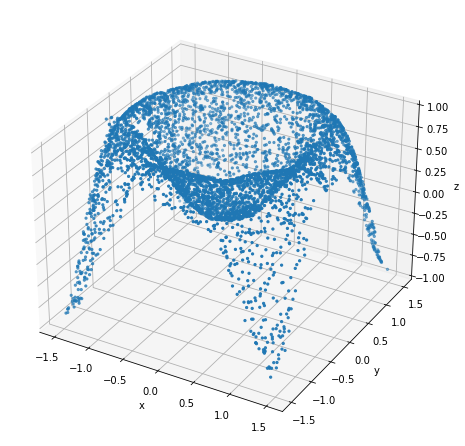

In [36]:
fig = plt.figure(figsize=(6,6))
X=x_predicted[:,0]
Y=x_predicted[:,1]
Z=z_predicted
print(Z)
ax = Axes3D(fig)
ax.scatter(X, Y, Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_zlim3d(-1, 1)

plt.show()

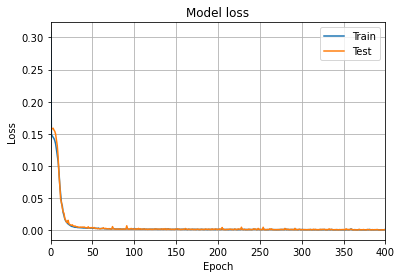

In [37]:
plt.title('Model loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xlim(0, 400)
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

## Noise

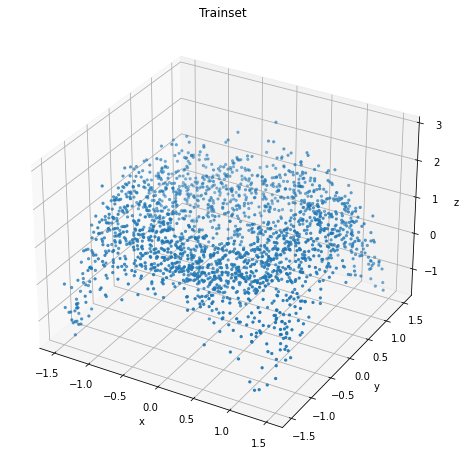

In [38]:
ntrain=2000
nval=200
xmin=-1.5
xmax=1.5
sigma=0.5     #medium noise
x_train=[]
x_val=[]
z_train=[]
z_val=[]


def f(x,y):
    return np.sin(x**2 + y**2)
np.random.seed(0)


x_train = np.zeros((ntrain, 2))
z_train = np.zeros((ntrain, 1))

x_val = np.zeros((nval, 2))
z_val = np.zeros((nval, 1))

for i in range(ntrain):
    x_train[i,0]=np.random.uniform(xmin, xmax) # x values 
    x_train[i,1]=np.random.uniform(xmin, xmax) #y values
    z_train[i]= np.random.normal(np.sin(x_train[i,0]**2+x_train[i,1]**2),sigma)
for i in range(nval):
    x_val[i,0]=np.random.uniform(xmin, xmax)
    x_val[i,1]=np.random.uniform(xmin, xmax)
    z_val[i]= np.random.normal(np.sin(x_val[i,0]**2+x_val[i,1]**2),sigma)

M=ntrain

X=x_train[:,0]
Y=x_train[:,1]
Z=z_train
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.scatter(X, Y, Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.title('Trainset')
plt.show()

In [39]:
keras.backend.clear_session()
tf.keras.activations.relu(x_train, alpha=1, max_value=4)
model = tf.keras.Sequential([
  Dense(6,input_shape=(2,),activation='relu'),
  Dense(10,activation='relu'),
  Dense(10,activation='relu'),
  Dense(10,activation='elu'),
  Dense(6,activation='softplus'), 
    Dense(8,activation='relu'),
  Dense(8,activation='tanh'),
  Dense(6,activation='relu'),
  Dense(1,activation='tanh')
])
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()
history = model.fit(x=x_train, y=z_train, 
          batch_size=32, epochs=400,          #400 epochs look enough
          verbose=0,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_val, z_val))
score = model.evaluate(x_val, z_val, batch_size=32, verbose=0)
x_predicted=np.random.uniform(-1.5,1.5,(5000,2))
z_predicted=model.predict(x_predicted)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 18        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                70        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 56        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 7

[[-0.07567663]
 [ 0.9010044 ]
 [ 0.379606  ]
 ...
 [ 0.93459195]
 [ 0.6313709 ]
 [ 0.75477326]]


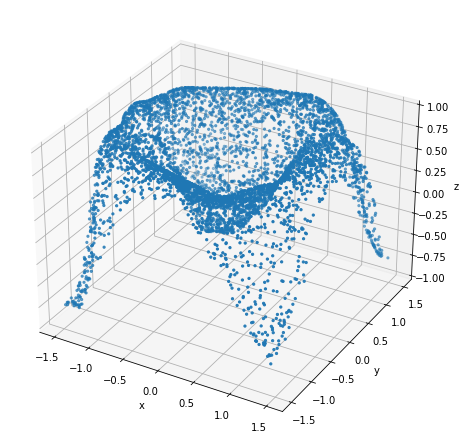

In [40]:
fig = plt.figure(figsize=(6,6))
X=x_predicted[:,0]
Y=x_predicted[:,1]
Z=z_predicted
print(Z)
ax = Axes3D(fig)
ax.scatter(X, Y, Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_zlim3d(-1, 1)

plt.show()

It doesn't look overfitted. 

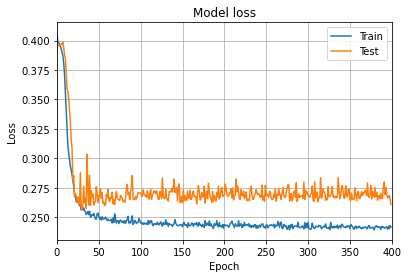

In [41]:
plt.title('Model loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xlim(0, 400)
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()